In [1]:
import sys
sys.path.append('/home/avic/Rotation-Generalization')
import istarmap
from my_dataclasses import *
from tools import *
import matplotlib.pyplot as plt

In [2]:
def translate_axes(restriction_axes):
    if restriction_axes[1] == '1':
        return 'YZ'
    elif restriction_axes[4] == '1':
        return 'XY'
    else:
        return 'XZ'

In [3]:
exps_frame = pd.read_csv('/home/avic/Rotation-Generalization/exps1.csv', index_col=0)
exps_frame = exps_frame[:1]
# exps_frame = exps_frame[(exps_frame.model_type == "ModelType.DenseNet") & (exps_frame.hole == 1) & (exps_frame.training_category == 'plane') & (~exps_frame.augment) & ~exps_frame.scale & ~ exps_frame.pretrained]
# exps_frame = exps_frame[
# #     ((exps_frame.training_category == 'SM') & (exps_frame.data_div == 40) & (exps_frame.model_type.isin(['ModelType.ResNet']))  & ~exps_frame.augment & ~exps_frame.scale & ~exps_frame.pretrained & (exps_frame.restriction_axes == '(0, 2)')) |
#     ((exps_frame.training_category == 'SM') & (exps_frame.data_div == 40) & (exps_frame.model_type.isin(['ModelType.ResNet']))  & ~exps_frame.augment & ~exps_frame.scale & ~exps_frame.pretrained & (exps_frame.restriction_axes == '(0, 1)') & (exps_frame.hole > 0))]

In [4]:
exps_frame

,job_id,data_div,model_type,pretrained,num,training_category,testing_category,hole,augment,scale,...,eval,testing_frame_path,stats,checkpoint,eval_heatmap,eval_heatmap_ood,eval_heatmap_id,unrestricted_axis,eval_heatmap_id_scaled,eval_heatmap_ood_scaled
0,0,10,ModelType.ResNet,False,0,plane,plane,0,False,False,...,/home/avic/om2/experiments/exp0/eval/Div10.csv,/home/avic/om2/experiments/exp0/eval/TestingFr...,/home/avic/om2/experiments/exp0/stats/Div10.csv,/home/avic/om2/experiments/exp0/checkpoints/Di...,/home/avic/om2/experiments/exp0/eval/Div10_hea...,/home/avic/om2/experiments/exp0/eval/Div10_hea...,/home/avic/om2/experiments/exp0/eval/0_heatmap...,2,/home/avic/om2/experiments/exp0/eval/0_heatmap...,/home/avic/om2/experiments/exp0/eval/0_heatmap...


1it [00:39, 39.60s/it]


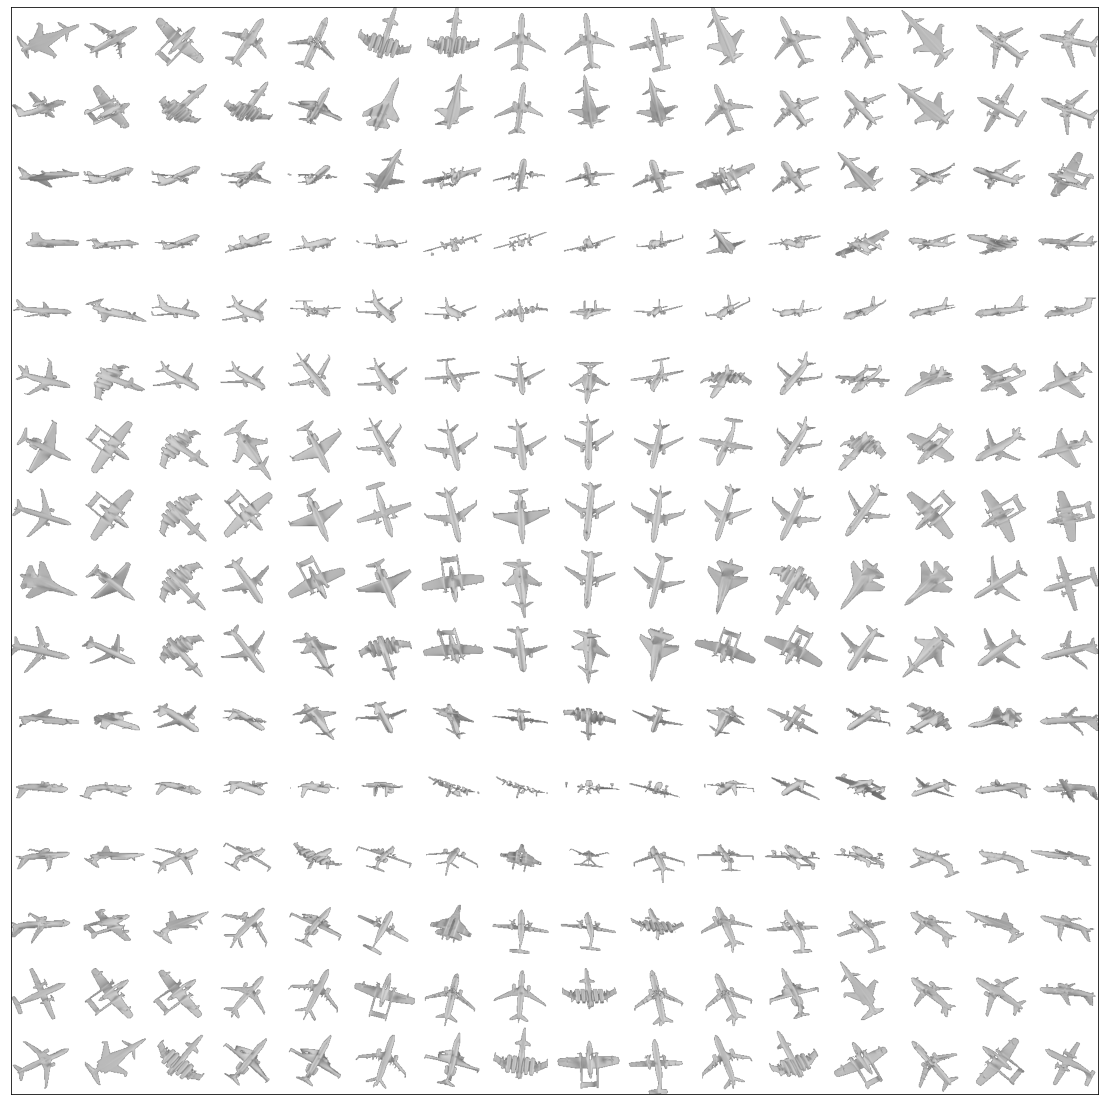

In [6]:
for exp in tqdm.tqdm(exps_frame.itertuples()):
    num_z_bins = 16
    border_width = 55
    border_size = 224 - (border_width * 2)
    _, heatmap, _, image = get_results(exp, 16, num_z_bins, True, False, img_boundary=border_width)
    image_reshaped = (np.transpose(image, (2,0,3,1,4,5)).reshape((num_z_bins, 16 * border_size, 16 * border_size, 4))/255)
    image_reshaped[...,3] = image_reshaped[...,0] > (100 / 255)
#     expanded_heatmap = np.moveaxis(np.broadcast_to(heatmap[:,np.newaxis,:,np.newaxis], (16, border_size, 16, border_size, num_z_bins)).reshape((16 * border_size, 16 * border_size, num_z_bins)), 2, 0)
    for i in range(16):
        plt.close('all')
        fig, axes = plt.subplots(1, figsize=(20,20))
#         axes.imshow(expanded_heatmap[i], norm=plt.Normalize(vmin=0, vmax=1))
        axes.imshow(image_reshaped[i])
        axes.set_xticks([])
        axes.set_yticks([])
        directory = f'/home/avic/Rotation-Generalization/notebooks/figures/heatmaps/with_images/examples/scale/{exp.training_category}/{exp.data_div}'
        os.makedirs(directory, exist_ok=True)
        plt.savefig(os.path.join(directory,f'cube{i}.pdf'), dpi=25, transparent=True, bbox_inches='tight')